# Pandas入门作业2

## 作业1

- 计算每个品种鸢尾花各个属性（花萼、花瓣的长度和宽度）的最小值、平均值又是分别是多少？ （提示：使用min、mean 方法。）
- 计算鸢尾花每个品种的花萼长度（sepal_length) 大于6cm的数据个数。

### 准备数据

In [3]:
import pandas as pd
import numpy as np

In [2]:
iris = pd.read_csv('iris.txt')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 问题1：计算每个品种鸢尾花各个属性（花萼、花瓣的长度和宽度）的最小值、平均值又是分别是多少？ 

In [4]:
#写出代码
min_ = iris.groupby('species').min()
print(min_)
mean_ = iris.groupby('species').mean()
print(mean_)

                 sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa               4.3          2.3           1.0          0.1
Iris-versicolor           4.9          2.0           3.0          1.0
Iris-virginica            4.9          2.2           4.5          1.4
                 sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


### 问题2：计算鸢尾花每个品种的花萼长度（sepal_length) 大于6cm的数据个数

In [11]:
#写出代码
# def count_n(iris, n):
#     count = 0;
#     for i in iris.sepal_length:
#         if i >n:
#             count=count+1
#     return count
# iris.groupby("species").apply(count_n, n = 6)

def count_n(iris, n):
    return (iris['sepal_length']>n).sum()
iris.groupby("species").apply(count_n, n = 6)

species
Iris-setosa         0
Iris-versicolor    20
Iris-virginica     41
dtype: int64

## 作业2：
分别找出2015, 2016年最流行的前10个男孩和女孩名字, 想给自己起一个流行的英文名字的可以行动起来了。
提示：使用groupby().apply()
- 思路一，使用ranked这一列， 取其值小于等于10的数据
- 思路二，使用pct这一列，用sort_values方法对其排列大小，取最大的10行数据

### 准备数据

In [79]:
# 读取数据，其中我们使用read_csv函数，以及循环

years = range(1880, 2017)  # 从1880年到2016年
pieces = []  # 初始化一个列表来储存每一年的数据
columns = ['name', 'gender', 'frequency']  # 设置每一列的名称

# 文件名的规律是yob + 年份，所以可以使用循环读取每一年的数据
for year in years:  
    path = 'names/yob%d.txt' % year  
    frame = pd.read_csv(path, names=columns)  
    frame['year'] = year  
    pieces.append(frame)
    
# 最后使用concat方法将pieces列表中所有的DataFrame整合在一起
baby_names = pd.concat(pieces, ignore_index=True)

In [82]:
baby_names.head()
# baby_names[baby_names.year.isin(['2015','2016'])]

,name,gender,frequency,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


### 问题：分别找出2015, 2016年最流行的前10个男孩和女孩名字

In [90]:
#写出代码
def first_n(baby_names,n):
    return baby_names[baby_names.year.isin(['2015','2016'])].sort_values(by = "frequency", ascending = False)[:10]
baby_names.groupby("gender").apply(first_n, n = 10)

name gender  frequency  year
gender                                          
F      1825963      Emma      F      20415  2015
       1825964    Olivia      F      19638  2015
       1859026      Emma      F      19414  2016
       1859027    Olivia      F      19246  2016
       1825965    Sophia      F      17381  2015
       1825966       Ava      F      16340  2015
       1859028       Ava      F      16237  2016
       1859029    Sophia      F      16070  2016
       1825967  Isabella      F      15574  2015
       1825968       Mia      F      14871  2015
M      1845017      Noah      M      19594  2015
       1877783      Noah      M      19015  2016
       1845018      Liam      M      18330  2015
       1877784      Liam      M      18138  2016
       1845019     Mason      M      16591  2015
       1845020     Jacob      M      15914  2015
       1845021   William      M      15863  2015
       1877785   William      M      15668  2016
       1877786     Mason      M      15192  2016
       1845022     Ethan      M      15049  2015

## 作业3：餐馆小费数据分析
* 小费，指给予服务生消费额以外的赏钱，在美国餐馆用餐完后通常会给服务生15-20%的小费。
* 这个数据是由Bryant和Smith于1995年所著的商务统计上的一个数据

** 分析什么因素会影响小费比例？**
* 一个优秀的数据分析员一定是一个可以提出有意义问题的人
* 好的数据分析员往往可以根据商业背景提出一些假说，然后通过数据来验证这些假说

* 要求提3个假说，然后分析

### 准备数据

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format="retina"
# 读取csv数据文件
tips = pd.read_csv('tips.csv')

In [15]:
# total_bill：账单总额
# tip: 所付小费
# sex: 性别
# smoker：是否吸烟
# day：周一至周日的一天
# time：晚餐(dinner)还是午餐(lunch)
# size: 用餐人数
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 问题：分析什么因素会影响小费比例？

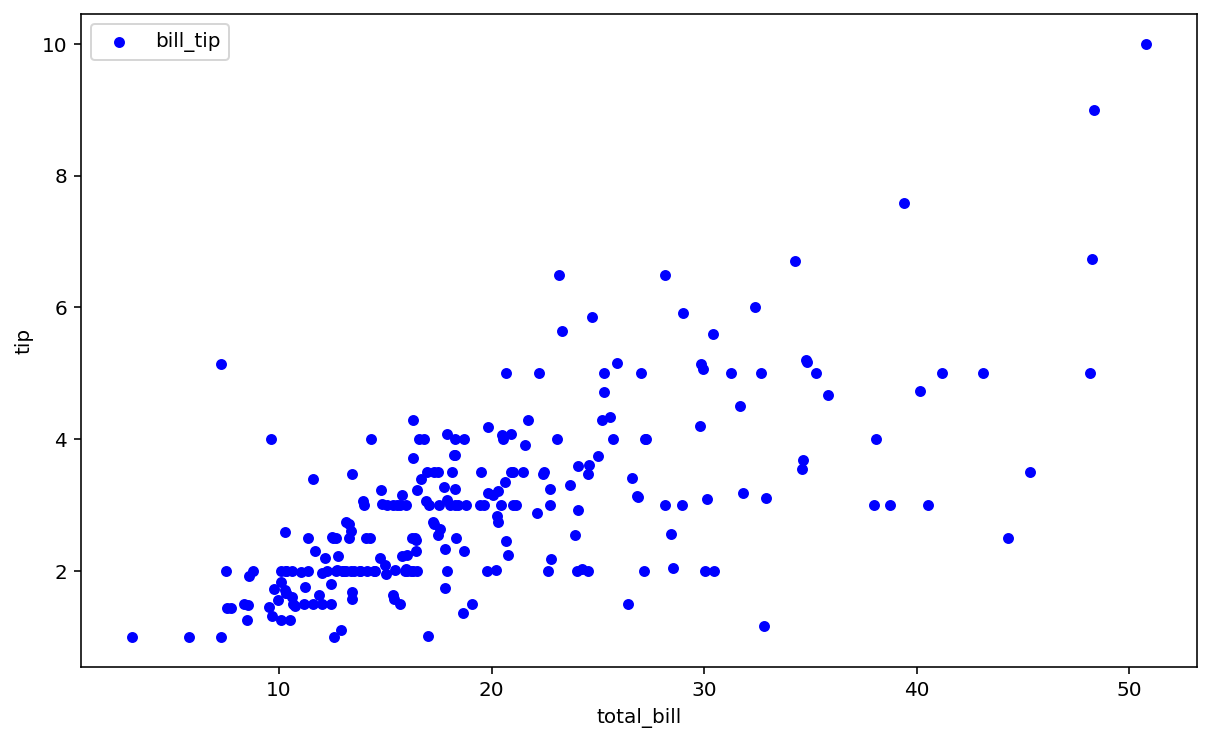

In [20]:
#写出代码
# 散点图，得到小费随消费额的增加而增加这个趋势，但是要验证这是不是真的。
tips.plot(kind="scatter",x="total_bill",y="tip",color="blue",label="bill_tip",figsize=(10,6))


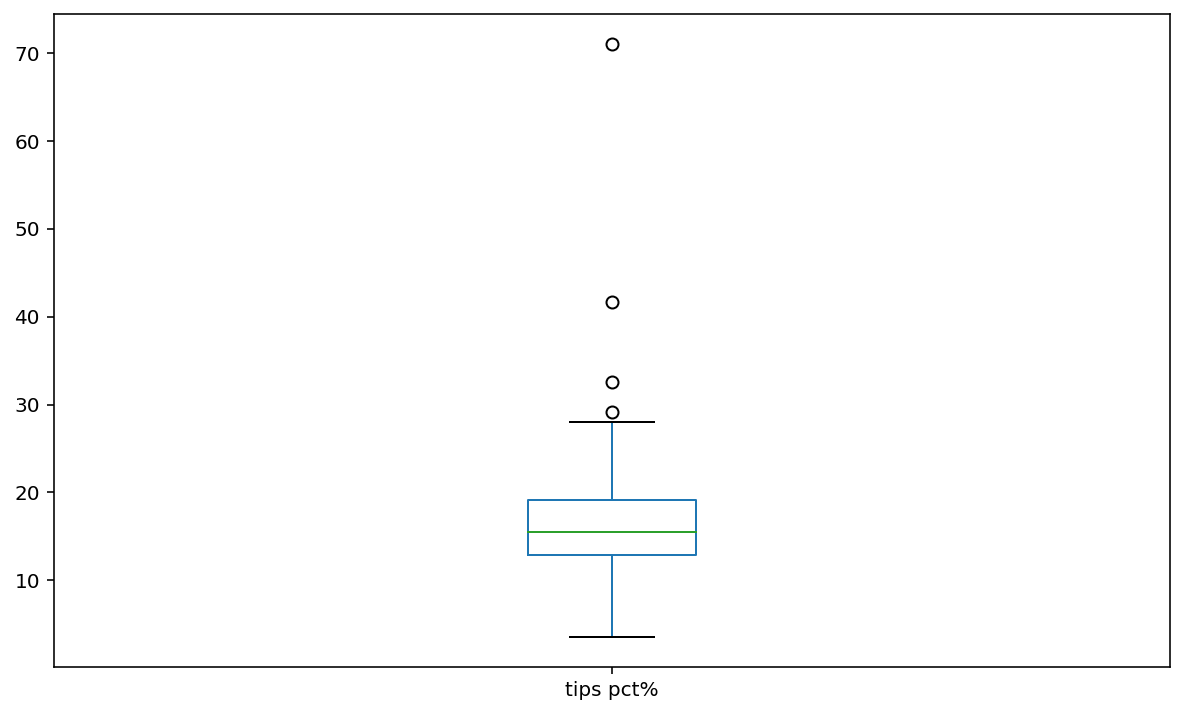

In [21]:
# 计算小费比例
tips["pct"]=tips.tip/tips.total_bill*100
tips.head()

#整体数据的小费比例箱线图
tips.pct.plot(kind="box",label="tips pct%",figsize=(10,6))

In [22]:
# 看一下这些“异常值”的具体情况
tips[tips.pct>30]

,total_bill,tip,sex,smoker,day,time,size,pct
67,3.07,1.00,Female,Yes,Sat,Dinner,1,32.573290
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.034483
178,9.60,4.00,Female,Yes,Sun,Dinner,2,41.666667


In [24]:
# 账单总额很小，但是消费额度却很大，可以认定为异常值，需要排除后再进行分析
# 去除异常值
tips2=tips.drop([67,172,178])
# tips2[tips2.pct>30]

,total_bill,tip,sex,smoker,day,time,size,pct


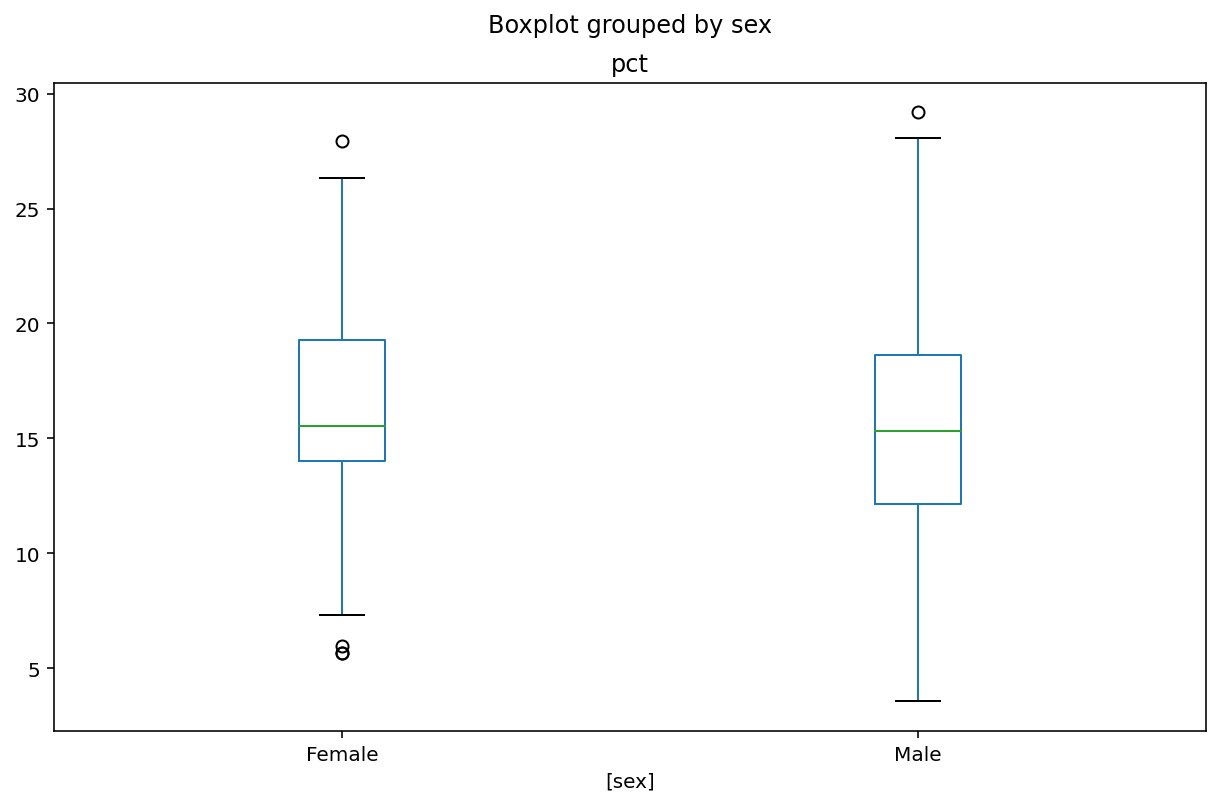

In [29]:
# 考虑，小费与性别、小费与日期、小费与吸烟习惯、小费与用餐时段、小费与用餐人数之间的关系
#小费与性别，绘制小费比例箱线图
tips2[["pct","sex"]].boxplot(grid=False,by="sex",figsize=(10,6))

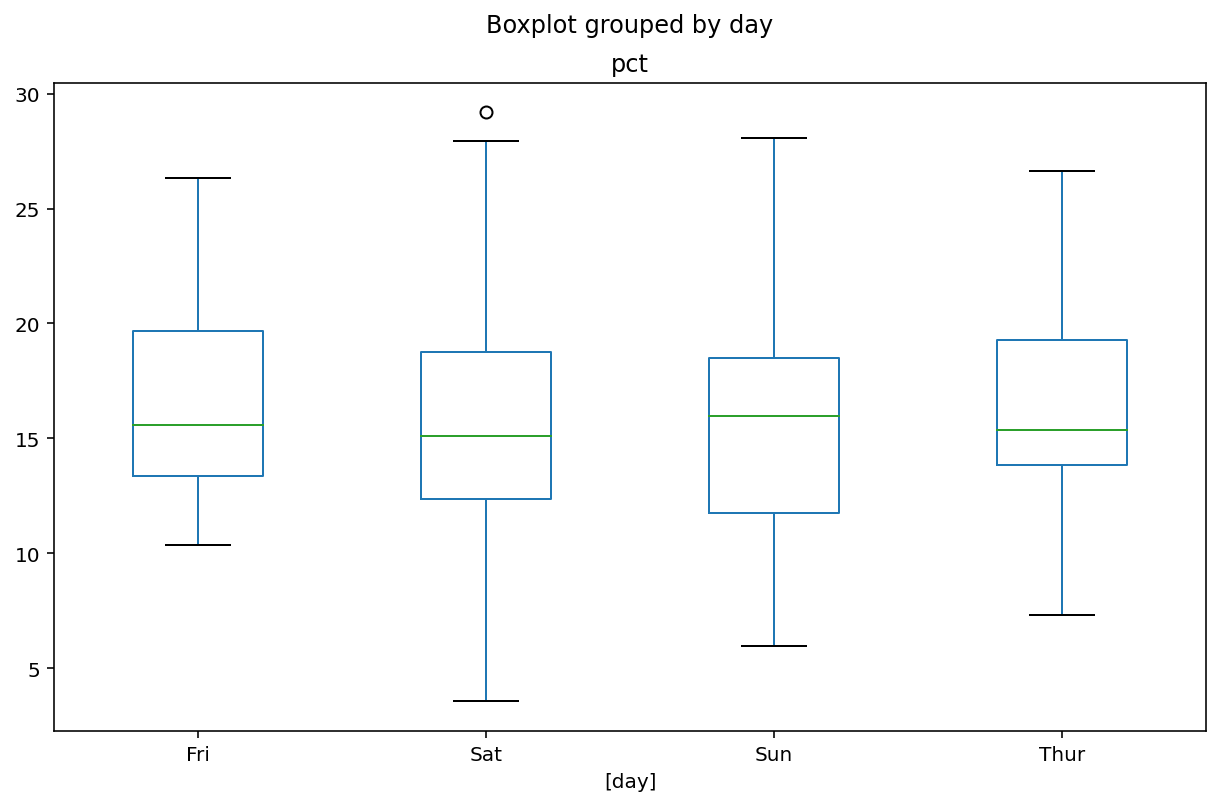

In [30]:
# 男女差异不大，中位数相近，但是女性的下四分位数比男性高，女性更容易给出稍高的小费。
#小费与日期，绘制小费比例箱线图
tips2[["pct","day"]].boxplot(grid=False,by="day",figsize=(10,6))

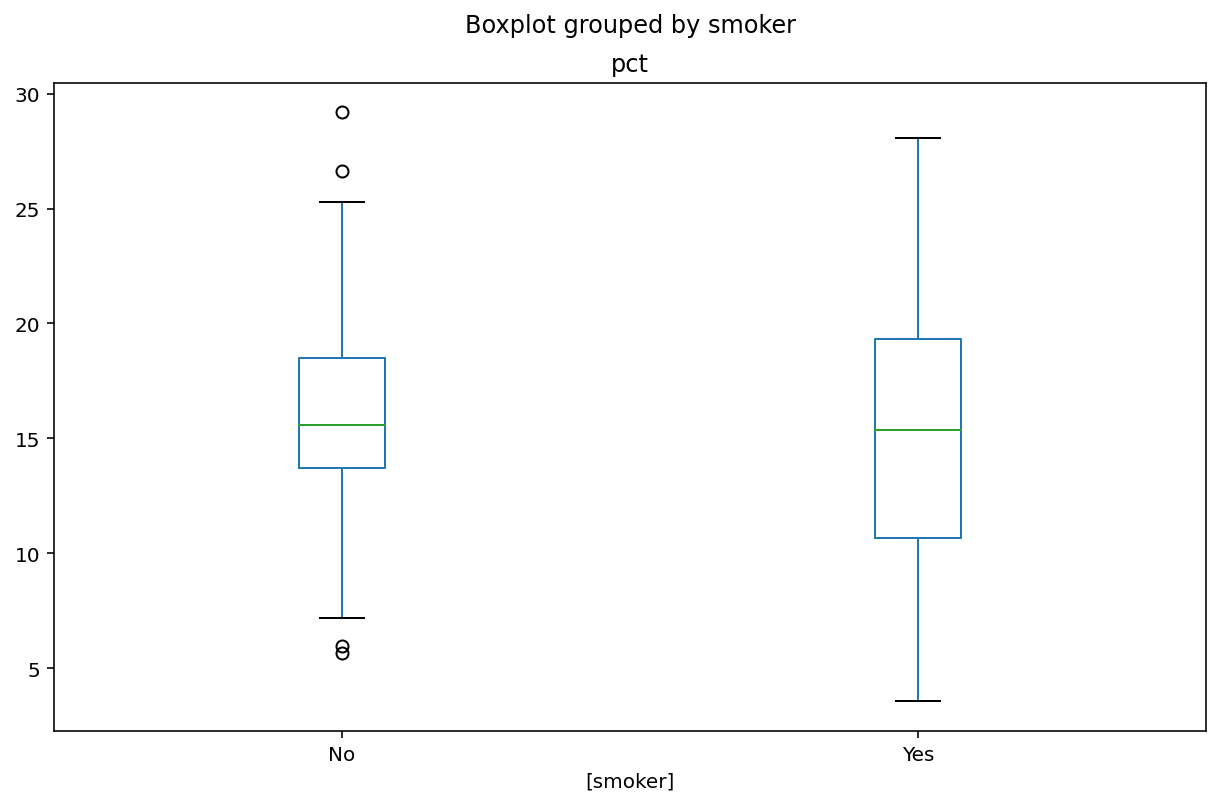

In [31]:
# 中位数区别也不大，但是可以看出周六周日的小费比例最大值比较高
# 小费与吸烟习惯，绘制小费比例箱线图
tips2[["pct","smoker"]].boxplot(grid=False,by="smoker",figsize=(10,6))

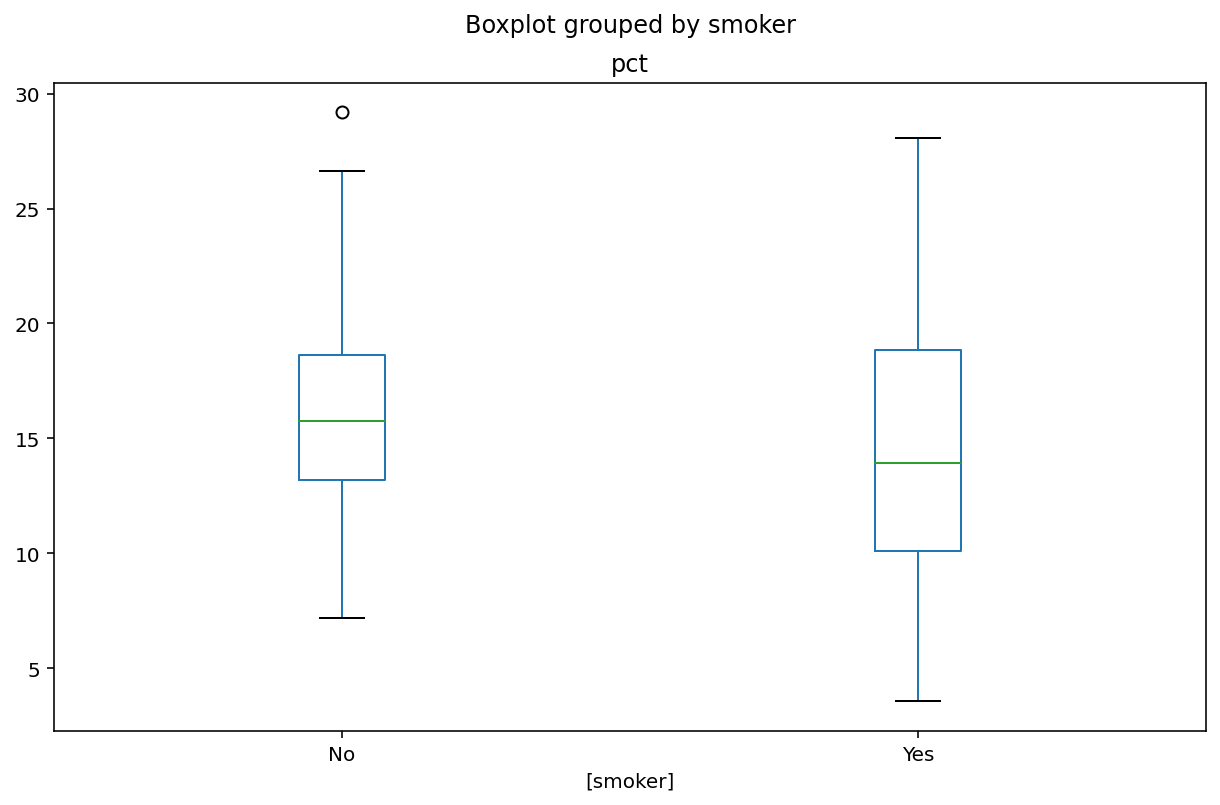

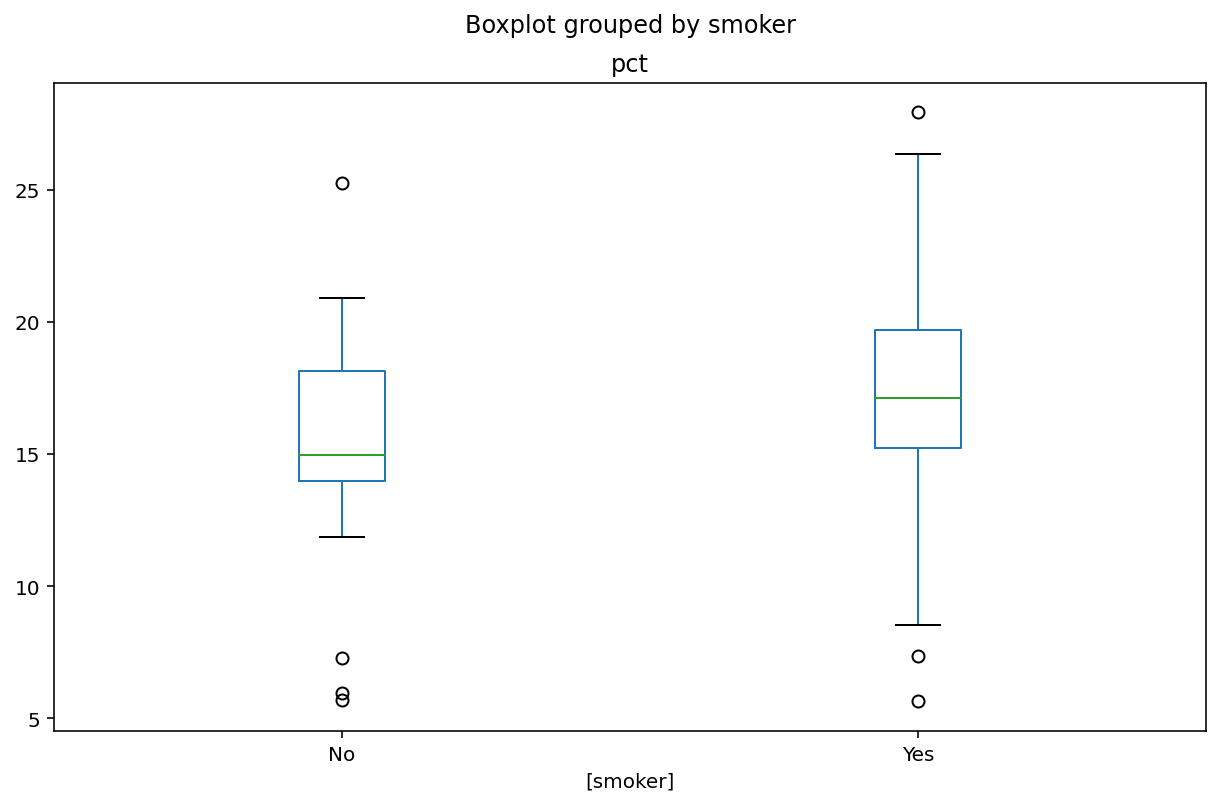

In [32]:
# 吸烟的人给出的小费比例范围更大，最大值也高，出手可能会随意一些。相比起吸烟者，不吸烟者给出小费会更为谨慎。
# 再按性别分组，绘制小费与吸烟习惯比例关系
tipsm=tips2[tips2.sex=="Male"]
tipsf=tips2[tips2.sex=="Female"]

tipsm[["pct","smoker"]].boxplot(grid=False,by="smoker",figsize=(10,6))
tipsf[["pct","smoker"]].boxplot(grid=False,by="smoker",figsize=(10,6))


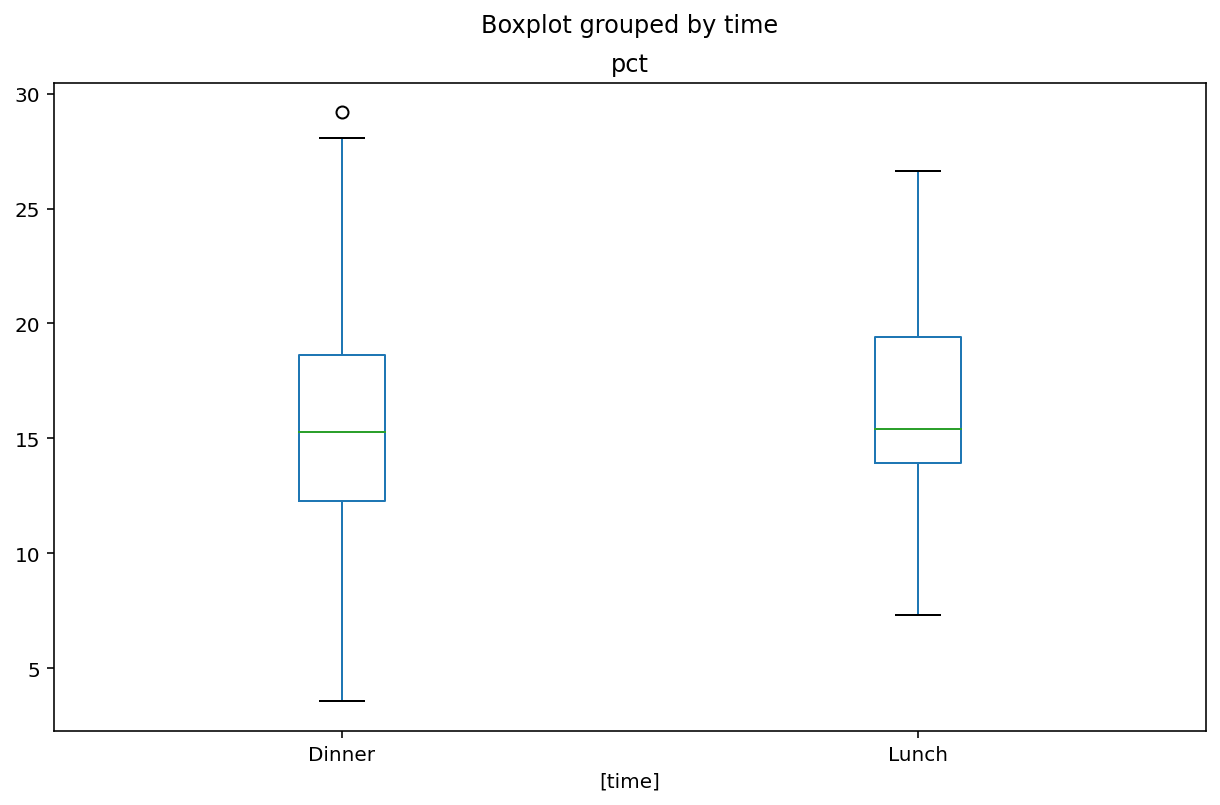

In [35]:
# 男性中的不吸烟群体的小费比例比吸烟群体要高，其中的原因可能是不吸烟的男性可能拥有更高的教育水平和经济能力。
# 女性中的吸烟群体的小费比例明显高于不吸烟群体，分布范围也更广。

#小费与用餐时段，绘制小费比例箱线图
tips2[["pct","time"]].boxplot(grid=False,by="time",figsize=(10,6))

In [36]:
# 晚餐时段，小费的分布更广，顾客给出小费比较随意，而午餐范围就小一些。可能是因为晚餐会饮酒等。
#小费比例与用餐人数的关系
tips2.groupby("size").mean()

,total_bill,tip,pct
size,,,
1,8.633333,1.583333,18.114505
2,16.552208,2.556429,16.055313
3,23.277632,3.393158,15.215685
4,28.613514,4.135405,14.594901
5,30.068000,4.028000,14.149549
6,34.830000,5.225000,15.622920


In [ ]:
# 用餐人数越多，比例反而越少。和一开始的散点图相反。
# 小费比例与用餐日期，是否吸烟，用餐人数，用餐时间，用餐者性别都有一些关系
# 可以分析一下，什么人能给出较高的小费比例。周六独自来餐厅吃晚餐的吸烟男性